# Uber Rides Data Analysis using Python
This project analyzes Uber ride data to understand rider behavior, usage trends, and travel patterns.

- **Main goal**: Analyse Uber rides data.
- We will use Python to:
  - Check how long people travel with Uber
  - What hour most people take Uber to their destination
  - Check the purpose of trips
  - Which day has the highest number of trips
  - What are the number of trips per each day
  - What are the trips in the month
  - The starting points of trips — where do people start boarding their trip from most


### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data Collection (Importing the dataset)

In [3]:
uber_data = pd.read_csv('data/UberDataset.csv')
uber_data.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Data Cleansing / Preprocessing

In [4]:
uber_data.info()  # Understanding our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


* Check for missing values

In [5]:
uber_data.isnull().any() # tells us which column has missing values

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [6]:
uber_data.isnull().sum() # tells us the amount of missing values in each column

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

There missing values in these columns, these columns would be useful for exploratory data analysis, so for that we would be filling the missing values with the 'unknown' keyword.

In [7]:
uber_data = uber_data.fillna('Unknown')

In [8]:
uber_data.head(3)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


* Date format is incorrect, it is currently being viewed as object but we want it in date format for analysis

In [9]:
# Dropping the last row which contains a 'Totals' summary — not an actual Uber trip record.
# This row has non-date text in 'START_DATE' and can interfere with datetime conversion and analysis.
uber_data = uber_data[uber_data['START_DATE'] != 'Totals']

# Convert to datetime
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format='mixed')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format='mixed')


* We would be extracting features from the start_date column to get the exact Day,  Month, Hour

In [10]:
uber_data['DAY'] = uber_data['START_DATE'].dt.day_name()
uber_data['MONTH'] = uber_data['START_DATE'].dt.month_name()

def get_time_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
uber_data['HOUR_OF_DAY'] = uber_data['START_DATE'].dt.hour
uber_data['PERIOD_OF_DAY'] = uber_data['START_DATE'].dt.hour.apply(get_time_day)

In [11]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,MONTH,HOUR_OF_DAY,PERIOD_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Saturday,January,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,14,Afternoon


# Data Analysis & Visualization

**Analyzing based on Categories we have**

In [12]:
uber_data['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

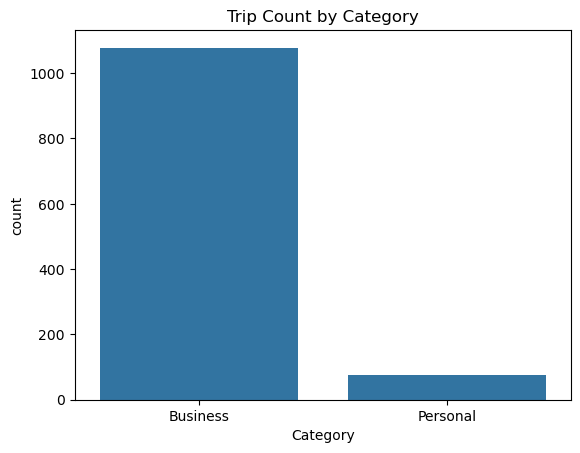

In [13]:
fig,ax = plt.subplots()
sns.countplot(data= uber_data, x='CATEGORY',ax=ax)
plt.title('Trip Count by Category')
plt.xlabel('Category');
fig.savefig('images/Trip Count by category')

* **Insight** :
    - From our plot and analysis , we can infer that clients preferred using Business version of rides rather than the Personal version.
* **Suggestion** :
     - Uber should focus more on Business category to maximize profit.

**Analyzing based on how long do people travel with uber**

In [14]:
uber_data['MILES'].mean(),uber_data['MILES'].max(), uber_data['MILES'].min()

(10.566839826839827, 310.3, 0.5)

* **Insight** : 
  -  The maximum distance travelled is **310.3 miles** and the minimum distance is **0.5 miles**. The average miles travelled is  **10.5**.

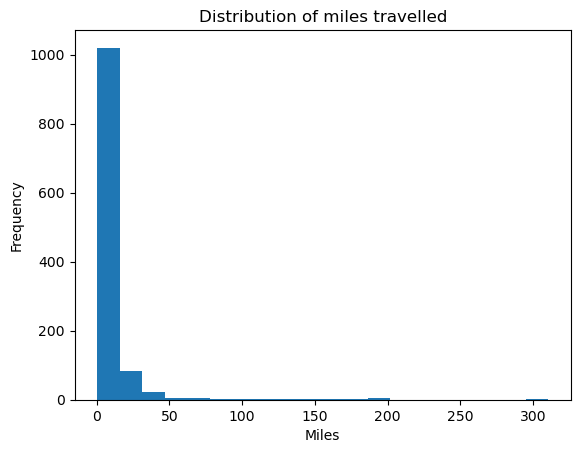

In [15]:
fig,ax = plt.subplots()
uber_data['MILES'].plot.hist(bins=20,ax=ax)
plt.xlabel('Miles');
plt.title('Distribution of miles travelled');
fig.savefig('images/Distribution of miles travelled')

* **Insight** :
  - Most customers travel between 1 - 50 miles

**Analyzes based on the hour most people take Uber to their destination**


In [16]:
uber_data['PERIOD_OF_DAY'].value_counts()

PERIOD_OF_DAY
Afternoon    446
Evening      328
Morning      244
Night        137
Name: count, dtype: int64

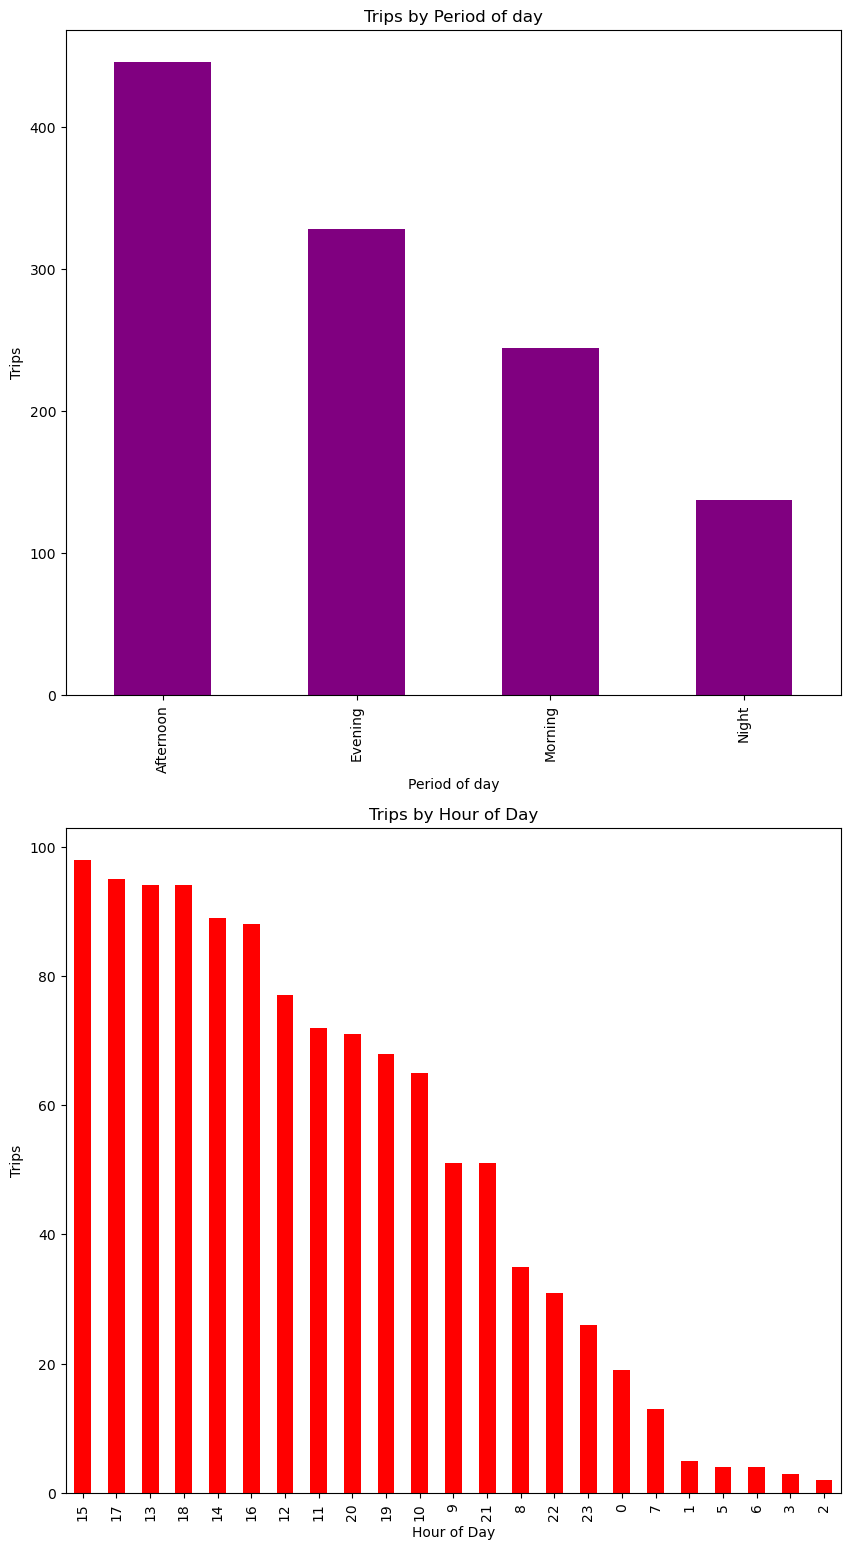

In [17]:
fig,(ax0,ax1 )= plt.subplots(nrows=2,ncols=1,figsize=(10,19))

uber_data['PERIOD_OF_DAY'].value_counts().plot(ax=ax0,kind='bar',color='purple')
ax0.set(title='Trips by Period of day',
       xlabel='Period of day',
       ylabel='Trips')

uber_data['HOUR_OF_DAY'].value_counts().plot(ax=ax1,kind='bar',color='red')
ax1.set(title='Trips by Hour of Day',
       xlabel='Hour of Day',
       ylabel='Trips');

fig.savefig('images/Trip by Hour and Period of day plot')


* **Insight** :
   - From our first plot and analysis, Clients book uber rides the most during afternoon periods. There were **446 trips** during the afternoon period.
   -  From the second plot, we can see the most trips occured between the hours of **15, 17, 13, 18 and 14**. At the hour of 15:00 , there were **98 trips**.
* **Suggestion** : Uber should focus more making rides available during the afternoon and making more advert for afternoon  periods to maximize profit.

* **Analyzes by purpose of trips**

In [18]:
uber_data['PURPOSE'].value_counts()

PURPOSE
Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

* **Insight**:
  - For the purpose category , there 502 unknown responses . I decided to leave these in the table because we can still get some insights from other columns.

In [19]:
valid_purpose = uber_data[ uber_data['PURPOSE'] != 'Unknown']
valid_purpose['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

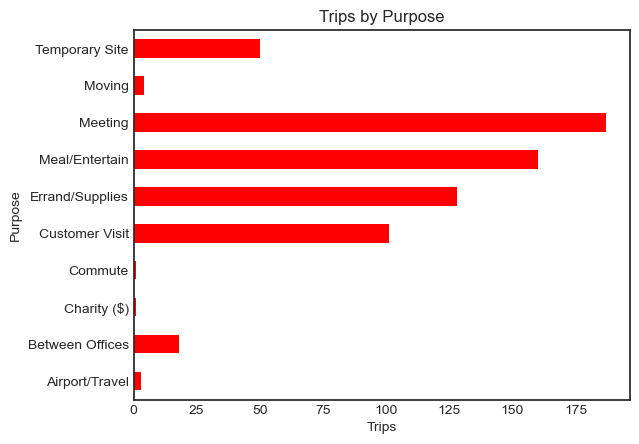

In [20]:
plt.style.use('seaborn-v0_8-white')
valid_purpose['PURPOSE'].value_counts().sort_index().plot(kind='barh',color='red',title='Trips by Purpose',ylabel='Purpose',xlabel='Trips');

* **Insight**:
    - Excluding the unknown responses, the purpose with the highest count was Meeting suggesting that a lot of people use Uber for meetings. **187** clients used Uber for Meeting purpose.
    - Amoung the highest purpose  was also  meal / entertain,  errand, customer visit.
* **Suggestion**:
    - Uber should target people who go for meetings more . Followed by people who go for meal/entertain, errand or customer visit.
  - Offering discounts to encourage clients.

**Analyses based on the day with the highest number of trips**

In [21]:
uber_data['DAY'].value_counts()

DAY
Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

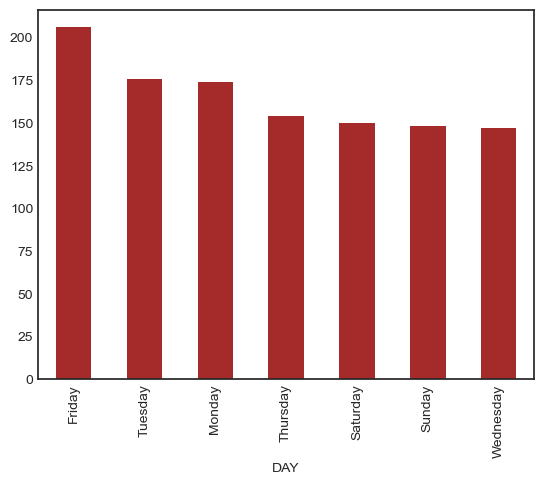

In [22]:
fig,ax = plt.subplots()
uber_data['DAY'].value_counts().plot(kind='bar',color='brown',ax=ax);
fig.savefig('images/Trips by day')


* **Insight**:
   - From our plot , **Friday** is the day with the most trips.
* **Suggestion**:
   - Uber should make more ride available on friday.
   - Giving out more coupons to encourage rides

**Analyses based on the number of trips per each day**

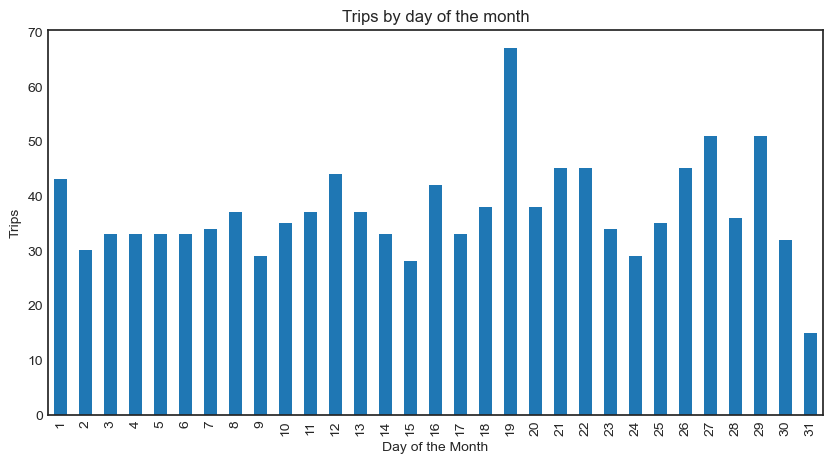

In [23]:
fig,ax = plt.subplots()
uber_data['START_DATE'].dt.day.value_counts().sort_index().plot(kind='bar',figsize=(10,5),title='Trips by day of the month',xlabel='Day of the Month',ylabel='Trips');
fig.savefig('images/Trip by day of the month')


* **Insight**:
   - From our chart, we can infer that most tips occured on the 19th. In total, we had **67** trips on the 19th.
* **Suggestion** : We need to figure out what the 19th special. Is it a special day or an events day. Figuring this out would let us know get the most profit.

**Analyzes based on the trips in the month**

In [24]:
uber_data['MONTH'].value_counts()

MONTH
December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

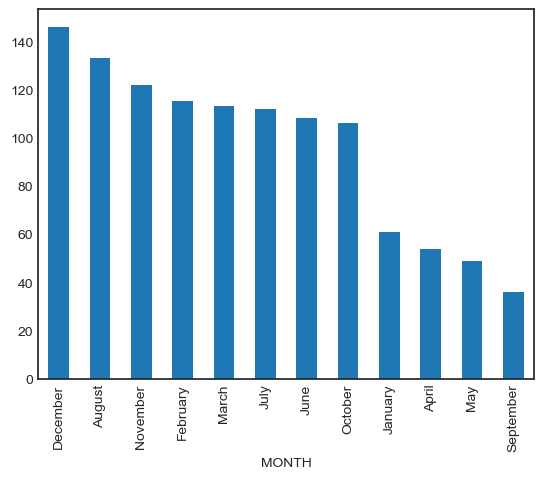

In [25]:
fig,ax = plt.subplots()
uber_data['MONTH'].value_counts().plot(kind='bar',ax=ax);
fig.savefig('images/Trip by Month')


* **Insight**:
     - From our plot , we can infer that the month of **December** had the most trips.
     - There were **146** trips in December.
* **Suggestion** :
  - The month of December should be priotized when it comes to making advert to maximize profit

**Analyses based on the starting point of trips / where people start their trip from the most**

In [26]:
uber_data['START'].value_counts()

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

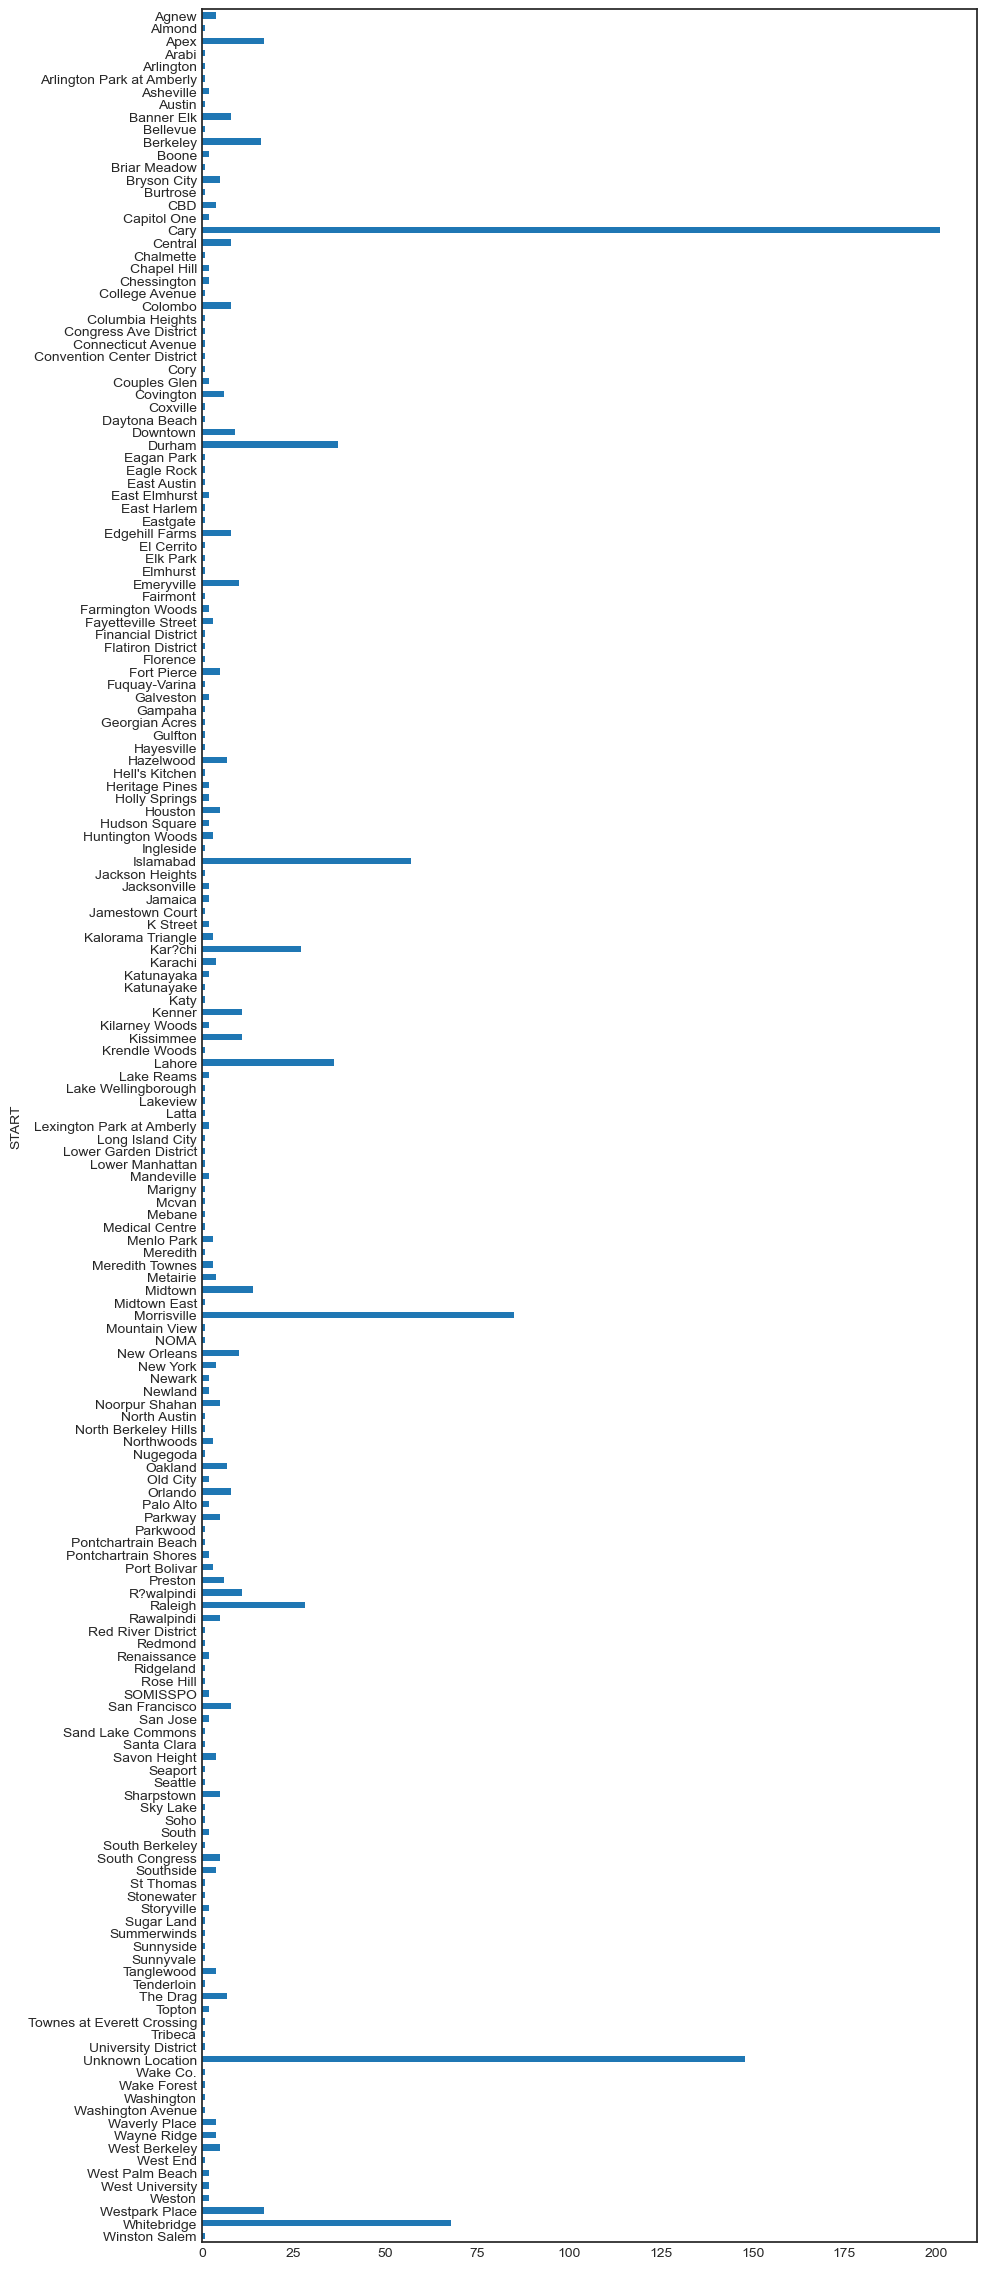

In [27]:
fig,ax = plt.subplots()
uber_data['START'].value_counts().sort_index(ascending=False).plot(kind='barh',figsize=(10,29),ax=ax);
fig.savefig('images/Trips by starting location');


* **Insight**: From our plot, we can see most people start from Cary

# Conclusion

**Most Frequent Purpose of Trips** :
The majority of Uber trips were for Business purposes, indicating Uber's strong usage among working professionals and for work-related travel.

**Popular Hours for Uber Usage** :
Uber rides peaked between 5 PM and 7 PM, suggesting high demand during evening hours — likely for commuting or after-work activities.

**Most Active Days of the Week** :
Thursdays and Fridays had the highest number of trips, pointing to increased end-of-week travel, possibly due to work and social plans.

**Trip Frequency by Month** :
March and April saw the most Uber activity, which may correlate with springtime travel trends or business events.

**Trip Duration Trends**
Most Uber trips were short-to-medium length, with a high concentration of trips under 30 minutes — ideal for inner-city movement.

**Starting Point Patterns**
Trips frequently started in central business districts or densely populated areas, reflecting high demand in commercial and residential hubs.